In [35]:
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Q. (a) Do SMM for n = 100, 400

### (1) Fix y_400, y_100
draw random y from true distribution.
to fix the seed, from hereon I will not change the data for y 

In [4]:
y_400 = list(np.random.normal(0, 1, 400)) 
y_100 = list(np.random.normal(0, 1, 100)) 

In [13]:
g_400 = sample_moment_generator(y_400)
g_100 = sample_moment_generator(y_100)

### (2) Discretize Sigma Space

In [10]:
sigma_space = list(np.linspace(0,2,100)) 

### (3) n = m = 400 case

In [64]:
estimated_sigma400 = []
for iterate in range(50):
    # 1. one step 
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 400)
        Q_n = np.dot(g_400-gamma_m, g_400-gamma_m)
        Q_n_list.append(Q_n)

    # 2. find argmin Q_n
    minimizer = sigma_space[Q_n_list.index(min(Q_n_list))]

    # 3. construct W_star
    gamma_m = gamma(minimizer, 400)
    omega_hat = np.outer(g_400-gamma_m, g_400-gamma_m)
    try:
        W_star = inv(omega_hat)
    except:
        W_star = np.identity(2)

    # 4. Two Step GMM
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 400)
        Q_n = (g_400-gamma_m)@W_star@(g_400-gamma_m)
        Q_n_list.append(Q_n)
    minimizer2 = sigma_space[Q_n_list.index(min(Q_n_list))]
    
    estimated_sigma400.append(minimizer2)

### (4) n = m = 100 case

In [65]:
estimated_sigma100 = []
for iterate in range(50):
    # 1. one step 
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 100)
        Q_n = np.dot(g_100-gamma_m, g_100-gamma_m)
        Q_n_list.append(Q_n)

    # 2. find argmin Q_n
    minimizer = sigma_space[Q_n_list.index(min(Q_n_list))]

    # 3. construct W_star
    gamma_m = gamma(minimizer, 100)
    omega_hat = np.outer(g_100-gamma_m, g_100-gamma_m)
    try:
        W_star = inv(omega_hat)
    except:
        W_star = np.identity(2)

    # 4. Two Step GMM
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 100)
        Q_n = (g_100-gamma_m)@W_star@(g_100-gamma_m)
        Q_n_list.append(Q_n)
    minimizer2 = sigma_space[Q_n_list.index(min(Q_n_list))]
    
    estimated_sigma100.append(minimizer2)

## Q. (b) Plot the result

<function matplotlib.pyplot.show(close=None, block=None)>

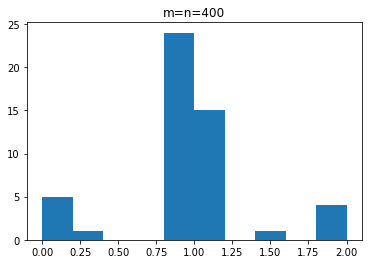

In [66]:
plt.hist(estimated_sigma400)
plt.title("m=n=400")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

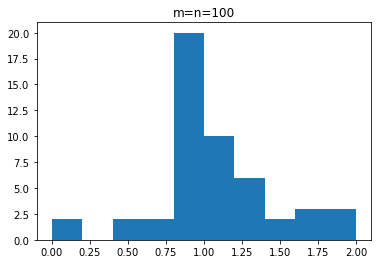

In [67]:
plt.hist(estimated_sigma100)
plt.title("m=n=100")
plt.show

## Q. (c)

In [69]:
print("when n = 400", 20*np.std(np.array(estimated_sigma400)))
print("when n = 100", 10*np.std(np.array(estimated_sigma100)))
print("under mle this number would go down, because it is more efficient")

when n = 400 8.772427144892553
when n = 100 4.095790079816179
under mle this number would go down, because it is more efficient


## Q. (d) 

### calculate g_n using 100 samples
### calculate gamma_m using 400 samples

In [70]:
estimated_sigma = []
for iterate in range(50):
    # 1. one step 
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 400)
        Q_n = np.dot(g_100-gamma_m, g_100-gamma_m)
        Q_n_list.append(Q_n)

    # 2. find argmin Q_n
    minimizer = sigma_space[Q_n_list.index(min(Q_n_list))]

    # 3. construct W_star
    gamma_m = gamma(minimizer, 400)
    omega_hat = np.outer(g_100-gamma_m, g_100-gamma_m)
    try:
        W_star = inv(omega_hat)
    except:
        W_star = np.identity(2)

    # 4. Two Step GMM
    Q_n_list = []
    for i in sigma_space:
        gamma_m = gamma(i, 400)
        Q_n = (g_100-gamma_m)@W_star@(g_100-gamma_m)
        Q_n_list.append(Q_n)
    minimizer2 = sigma_space[Q_n_list.index(min(Q_n_list))]
    
    estimated_sigma.append(minimizer2)

<function matplotlib.pyplot.show(close=None, block=None)>

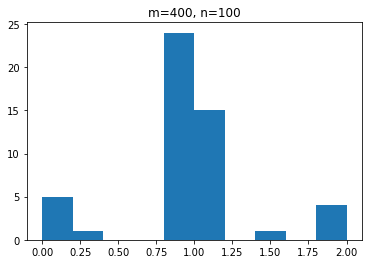

In [71]:
plt.hist(estimated_sigma400)
plt.title("m=400, n=100")
plt.show

In [12]:
def gamma(sigma, simulation_size):
    '''
    input: conjectured sigma, simulation size in {100, 400}
    output: array of sample analogy for moment condition
    '''
    # 1. Draw Random Data from N(0, sigma)
    random_data = list(np.random.normal(0, math.sqrt(sigma), simulation_size))
    gamma_m = sample_moment_generator(random_data)
    return gamma_m

In [5]:
def sample_moment_generator(simulated_data):
    '''
    input: list of simulated data
    output: array of sample analogy for moment condition
    '''
    first = 0
    second = 0
    sample_count = 0
    
    for i in simulated_data:
        sample_count += 1
        if i >= -1 and i <= 1:
            first += 1
        if i >= -2 and i <= 2:
            second += 1
    
    sample_analogy = np.array([first/sample_count, second/sample_count])
    return sample_analogy